# Análise Descritiva Dados Públicos

#### Importando bibliotecas

In [73]:
# install.packages("dplyr")
# install.packages("ggplot2")
# install.packages("arrow")

In [ ]:
library(dplyr)
library(ggplot2)
library(arrow)

#### Lendo base de dados

In [75]:
dataset <- read_parquet("DataSet/Despesasparlamentar/dataset_agrupado_2019_2021.parquet")

#### Transformando base de dados para análise

In [77]:
# Criamos uma cópia da base de dados
base_copia <- dataset

In [78]:
# Removemos as colunas que não serão utilizadas na análise
base_copia$cpf <- NULL
base_copia$numEspecificacaoSubCota <- NULL
base_copia$txtCNPJCPF <- NULL
base_copia$txtNumero <- NULL
base_copia$numParcela <- NULL
base_copia$ideDocumento <- NULL
base_copia$urlDocumento <- NULL

In [79]:
# Observações e Variáveis
dim(base_copia)

[1] 649804     24

In [80]:
glimpse(base_copia)

Rows: 649,804
Columns: 24
$ NomeParlamentar           <fct> LID.GOV-CD, LID.GOV-CD, LID.GOV-CD, LID.GOV-~
$ ideCadastro               <int> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, ~
$ nuCarteiraParlamentar     <int> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, ~
$ nuLegislatura             <int> 2015, 2019, 2019, 2019, 2019, 2019, 2019, 20~
$ sgUF                      <fct> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, ~
$ sgPartido                 <fct> , , , , , , , , , , , , , , , , , , , , , , ~
$ codLegislatura            <int> 55, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, ~
$ numSubCota                <int> 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, ~
$ txtDescricao              <fct> "FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR"~
$ txtDescricaoEspecificacao <fct> , , , , , , , , , , , , , , , , , , , , , , ~
$ txtFornecedor             <fct> "CRISTIANE FERREIRA EPP", "CRISTIANE FERREIR~
$ indTipoDocumento          <int> 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4,~
$ datEmissao  

### Estatistica Descritiva

##### Variáveis qualitativas: 
- NomeParlamentar
- ideCadastro
- nuCarteiraParlamentar
- nuLegislatura
- sgUF
- sgPartido
- codLegislatura
- numSubCota
- txtDescricao
- txtDescricaoEspecificacao
- txtFornecedor
- indTipoDocumento
- datEmissao
- numMes
- numAno
- txtPassageiro
- txtTrecho
- numLote
- numRessarcimento
- vlrRestituicao
- nuDeputadoId

##### Variáveis quantitativas: 
- vlrDocumento
- vlrGlosa
- vlrLiquido

In [81]:
# Vamos identificar quais variáveis tem dados nulos, neste caso deixamos apenas as existentes
paste("Quantos nulos existem na variável sgUF ",sum(is.na(base_copia$sgUF)))
paste("Quantos nulos existem na variável numRessarcimento ",sum(is.na(base_copia$numRessarcimento)))

#which(is.na(base_copia$sgUF))

[1] "Quantos nulos existem na variável sgUF  2145"

[1] "Quantos nulos existem na variável numRessarcimento  434997"

Identificamos que existem 2145 registros sem um UF atribuído, neste caso são despesas a nível federal que não são atribuídos a nenhum UF, nestes casos ajustamos o UF com a nomenclatura DF para identifica-los.

In [82]:
# Ajustando os dados nulos para nomenclatura DF:
base_copia$sgUF[which(is.na(base_copia$sgUF))] <- "DF"

# Verificando novamente se existem dados nulos: 
paste("Quantos nulos existem na variável sgUF ",sum(is.na(base_copia$sgUF)))

[1] "Quantos nulos existem na variável sgUF  0"

Identificamos que tem 434997 registros nulos para ressarcimento, neste caso vamos ajustar para valor 0 ao invés de nulo.

In [83]:
# Ajustando dados nulos para 0:
base_copia$numRessarcimento[which(is.na(base_copia$numRessarcimento))] <- 0

# Verificando novamente se existem dados nulos:
paste("Quantos nulos existem na variável numRessarcimento ",sum(is.na(base_copia$numRessarcimento)))

[1] "Quantos nulos existem na variável numRessarcimento  0"

#### Analisando as variáveis quantitativas da base

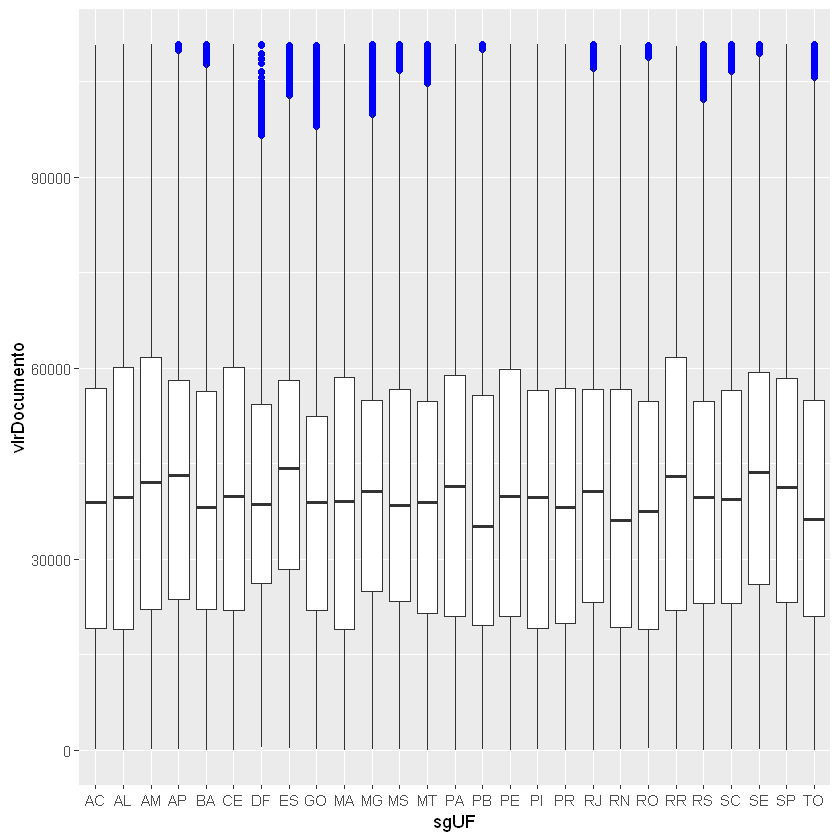

In [84]:
ggplot(base_copia, aes(y = vlrDocumento, x = sgUF)) +
  geom_boxplot(outlier.color = "blue")